In [7]:

"""
Conformer_rl Analysis Example
=============================
View the notebook in collab: https://drive.google.com/file/d/1Y6u4fFM4BkGLtxetZ0QWbR5sZO1U1KPr/view?usp=sharing

This notebook gives examples of how the analysis functions in conformer_rl can be used.
The example data (example_data1.pickle, example_data2.pickle and example_data3.pickle) were all
data taken from different evaluation episodes of an actual run.

The full API reference for the analysis module can be found at: 
"""
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
from conformer_rl import analysis

In [8]:
"""
Loading the data
----------------

We load the data by specifying the filenames of the .pickle files to load. Note that we can
load multiple sets of data. In this example, each data corresponds to a different evaluation episode
taken at different points in the training of an agent. By loading all three datasets we can compare the
performance of the agent across all three episodes.

We can also specify labels for the data (which will appear in the Seaborn plots).
"""
# Specify data files to load
files = [
    'example_data1.pickle',
    'example_data2.pickle',
    # 'example_data3.pickle'
]

# Specify labels for each data set
labels = [
    'example1',
    'example2',
    # 'example3'
]

data = analysis.load_data_from_pickle(files, labels)

<AxesSubplot:xlabel='run', ylabel='total_rewards'>

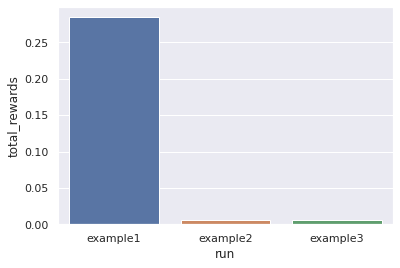

In [4]:
"""
bar_plot_episodic is used to compare any single scaler value across all sets of data.
In this example we visualize the total reward (sum of all rewards in the episode) across all three episodes.
"""
analysis.bar_plot_episodic("total_rewards", data)

(<Figure size 1440x576 with 3 Axes>,
 array([<AxesSubplot:xlabel='energy', ylabel='Count'>,
        <AxesSubplot:xlabel='energy', ylabel='Count'>,
        <AxesSubplot:xlabel='energy', ylabel='Count'>], dtype=object))

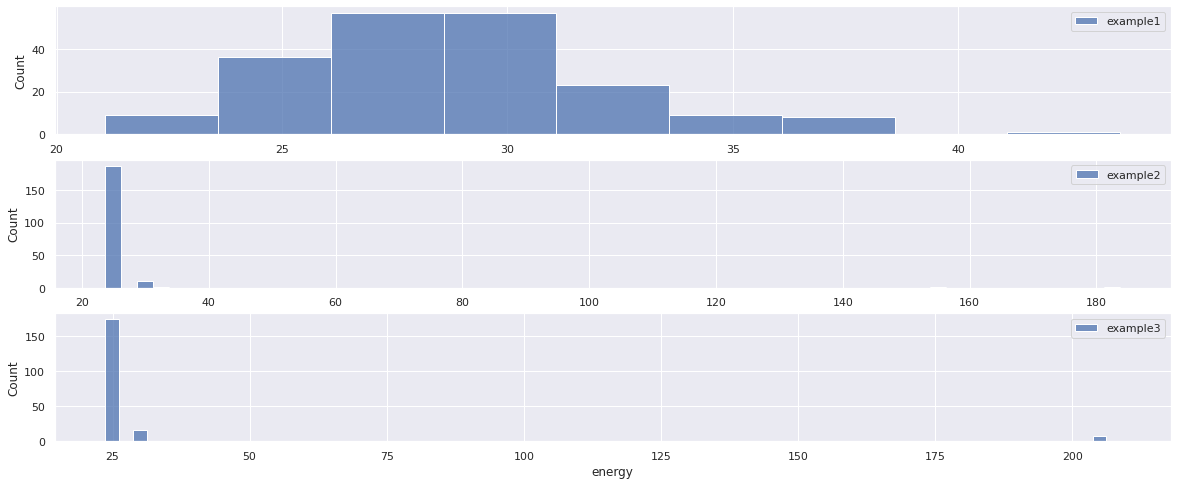

In [5]:
"""
histogram_episodic creates a histogram for each data set for the given key. In this case we will be creating
histogram of the energies of the conformers gneerated in each episode.
"""
analysis.histogram_episodic('energy', data, binwidth=2.5, figsize=(20, 8))

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='energy', ylabel='Count'>)

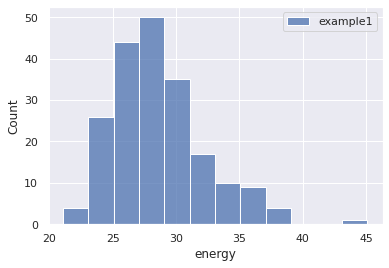

In [6]:
"""
We can also view individual histograms or compare a subset of the episodes in an overlayed histogram using histogram_select_episodes().
"""
analysis.histogram_select_episodes(key='energy', data=data, episodes=[0], binwidth=2)

In [7]:
"""
calculate_tfd() calculates the TFD (Torsional Fingerprint Deviation) matrix between all conformers for each dataset.
The TFD measures how similar the conformers are to each other and is helpful for determining the diversity of the conformers generated.
"""
analysis.calculate_tfd(data)

(<Figure size 576x1440 with 6 Axes>,
 array([<AxesSubplot:xlabel='example1'>, <AxesSubplot:xlabel='example2'>,
        <AxesSubplot:xlabel='example3'>], dtype=object))

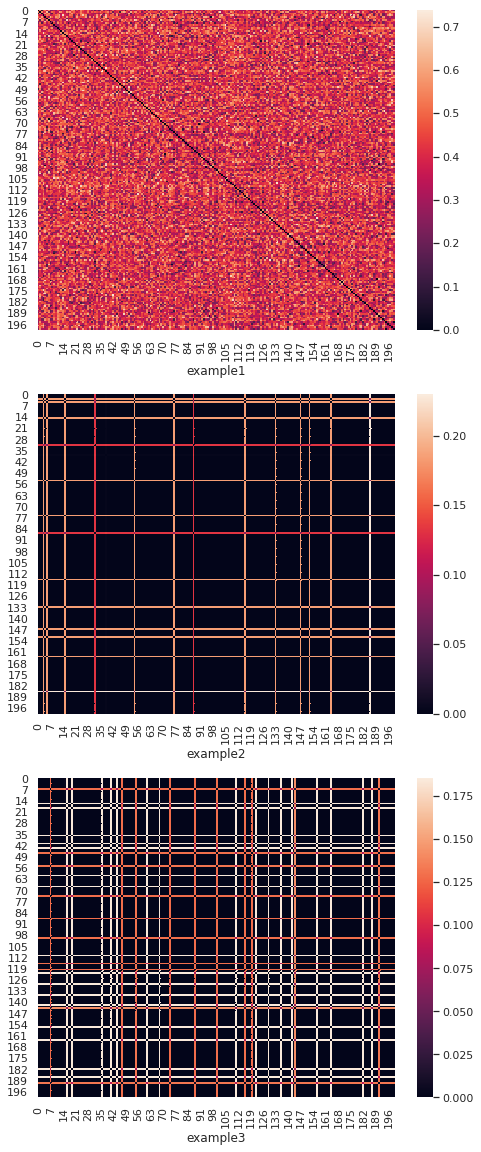

In [8]:

"""
We can then visualize the TFD matrices generated for each dataset.

Notice that second and third datasets have a lot of conformer pairs with low TFD. This means
that the agent generated many duplicate conformers.
"""
analysis.heatmap_episodic('tfd_matrix', data, figsize=(8, 20))

<AxesSubplot:xlabel='run', ylabel='tfd_total'>

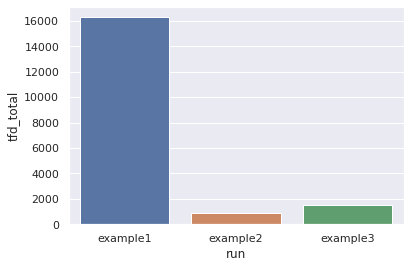

In [9]:
"""
We can also visualize the sum of the TFD matrices as a measure of the
diversity of the generated conformers for each dataset.
"""
analysis.bar_plot_episodic('tfd_total', data)

In [3]:
"""
Finally, we can visualize a single molecule from one of the datasets.
"""
analysis.drawConformer(data['mol'][0], confId=5, style='stick')

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [9]:
"""
We can also choose a conformer from each dataset and compare them.
"""
view = analysis.drawConformer_episodic(data, confIds=[1, 10], style='stick')
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [6]:
"""
We can also visualize multiple generated conformers within a dataset.
"""
runIds = [0, 5, 10]
for id in runIds:
    view = analysis.drawConformer(data['mol'][0], confId=id, style='stick')
    view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol